# Predict The Weather with Machine Learning



The five *core* values are: 

**PRCP** = Precipitation (mm or inches as per user preference, inches to hundredths on Daily Form pdf file)<br>
**SNOW** = Snowfall (mm or inches as per user preference, inches to tenths on Daily Form pdf file) <br>
**SNWD** = Snow depth (mm or inches as per user preference, inches on Daily Form pdf file) <br>
**TMAX** = Maximum temperature (Fahrenheit or Celsius as per user preference, Fahrenheit to tenths on Daily Form pdf file <br>
**TMIN** = Minimum temperature (Fahrenheit or Celsius as per user preference, Fahrenheit to tenths on Daily Form pdf file <br>

In [1]:
# libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error

In [2]:
# using date column as index
data = pd.read_csv('weather_data.csv', index_col="DATE")
data.head()

,STATION,NAME,ACMH,ACSH,AWND,DAPR,FMTM,FRGT,MDPR,PGTM,...,WT01,WT02,WT03,WT04,WT05,WT07,WT08,WT09,WT16,WT18
DATE,,,,,,,,,,,,,,,,,,,,,
1960-01-01,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960-01-02,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
1960-01-03,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960-01-04,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960-01-05,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17063 entries, 1960-01-01 to 2022-08-19
Data columns (total 35 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   STATION  17063 non-null  object 
 1   NAME     17063 non-null  object 
 2   ACMH     5844 non-null   float64
 3   ACSH     5844 non-null   float64
 4   AWND     8255 non-null   float64
 5   DAPR     8 non-null      float64
 6   FMTM     2190 non-null   float64
 7   FRGT     2 non-null      float64
 8   MDPR     8 non-null      float64
 9   PGTM     8511 non-null   float64
 10  PRCP     16782 non-null  float64
 11  SNOW     11380 non-null  float64
 12  SNWD     11504 non-null  float64
 13  TAVG     2037 non-null   float64
 14  TMAX     17054 non-null  float64
 15  TMIN     17053 non-null  float64
 16  TSUN     1151 non-null   float64
 17  WDF1     5844 non-null   float64
 18  WDF2     8256 non-null   float64
 19  WDF5     8168 non-null   float64
 20  WDFG     4267 non-null   float64
 21  WSF

## Preparing the Data

In [4]:
data.isnull().sum() / data.shape[0]

STATION    0.000000
NAME       0.000000
ACMH       0.657505
ACSH       0.657505
AWND       0.516205
DAPR       0.999531
FMTM       0.871652
FRGT       0.999883
MDPR       0.999531
PGTM       0.501201
PRCP       0.016468
SNOW       0.333060
SNWD       0.325793
TAVG       0.880619
TMAX       0.000527
TMIN       0.000586
TSUN       0.932544
WDF1       0.657505
WDF2       0.516146
WDF5       0.521303
WDFG       0.749927
WSF1       0.657505
WSF2       0.516087
WSF5       0.521303
WSFG       0.749927
WT01       0.780285
WT02       0.980250
WT03       0.992967
WT04       0.999766
WT05       0.998359
WT07       0.999883
WT08       0.811874
WT09       0.999883
WT16       0.885425
WT18       0.999824
dtype: float64

In [5]:
core_data = data[["PRCP","SNOW","SNWD","TMAX","TMIN"]].copy()

# change the column names
core_data.columns = ["precip","snowfall","snow_depth","temp_max","temp_min"]
core_data.head()

,precip,snowfall,snow_depth,temp_max,temp_min
DATE,,,,,
1960-01-01,0.0,0.0,0.0,49.0,30.0
1960-01-02,0.0,0.0,0.0,49.0,29.0
1960-01-03,0.0,0.0,0.0,54.0,35.0
1960-01-04,0.0,0.0,0.0,54.0,36.0
1960-01-05,0.0,0.0,0.0,55.0,33.0


## Dealing with Missing Values

In [6]:
core_data.isnull().sum() / core_data.shape[0]

precip        0.016468
snowfall      0.333060
snow_depth    0.325793
temp_max      0.000527
temp_min      0.000586
dtype: float64

In [7]:
core_data["snowfall"].value_counts()

0.0    11379
1.0        1
Name: snowfall, dtype: int64

I will delete this feature as it is not helpful for the model.

In [8]:
core_data["snow_depth"].value_counts()# no snow accumulation

0.0    11504
Name: snow_depth, dtype: int64

In [9]:
# deleting the unhelpful features

del core_data["snowfall"]
del core_data["snow_depth"]

In [10]:
# selecting the rows where precipitation is null

core_data[pd.isnull(core_data["precip"])]

,precip,temp_max,temp_min
DATE,,,
1983-10-29,NaN,67.0,57.0
1983-10-30,NaN,70.0,63.0
1983-10-31,NaN,69.0,61.0
1983-11-12,NaN,63.0,55.0
1983-11-13,NaN,60.0,50.0
...,...,...,...
2013-12-15,NaN,58.0,33.0
2016-05-01,NaN,80.0,55.0
2016-05-02,NaN,68.0,53.0


In [11]:
core_data.loc["1983-10-20":"1983-11-05",:]

,precip,temp_max,temp_min
DATE,,,
1983-10-20,0.00,73.0,52.0
1983-10-21,0.00,70.0,50.0
1983-10-22,0.00,70.0,50.0
1983-10-23,0.00,69.0,60.0
1983-10-24,0.00,73.0,58.0
1983-10-25,0.00,75.0,53.0
1983-10-26,0.00,79.0,53.0
1983-10-27,0.00,82.0,56.0
1983-10-28,0.00,74.0,56.0


In [12]:
core_data["precip"].value_counts()

0.00    13851
0.01      441
0.02      200
0.03      123
0.04      104
        ...  
1.29        1
1.73        1
1.05        1
1.38        1
1.02        1
Name: precip, Length: 176, dtype: int64

As we can see from here most of the values are 0. There fore for filling these missing values we can impute with the **mode**.

In [13]:
mode_precip = core_data["precip"].mode(dropna=True)
print("Mode of the precipitation: ", mode_precip)

Mode of the precipitation:  0    0.0
Name: precip, dtype: float64


In [14]:
core_data["precip"] = core_data["precip"].fillna(0.00)
core_data.head()

,precip,temp_max,temp_min
DATE,,,
1960-01-01,0.0,49.0,30.0
1960-01-02,0.0,49.0,29.0
1960-01-03,0.0,54.0,35.0
1960-01-04,0.0,54.0,36.0
1960-01-05,0.0,55.0,33.0


In [15]:
core_data[pd.isnull(core_data["temp_max"])]

,precip,temp_max,temp_min
DATE,,,
2004-11-20,0.0,NaN,NaN
2013-06-16,0.0,NaN,NaN
2019-04-18,0.0,NaN,50.0
2019-04-21,0.0,NaN,52.0
2019-04-22,0.0,NaN,50.0
2020-08-29,0.0,NaN,NaN
2020-09-08,0.0,NaN,NaN
2020-09-09,0.0,NaN,NaN
2021-10-31,0.0,NaN,56.0


In [16]:
core_data = core_data.fillna(method="ffill")

core_data.isnull().sum() / core_data.shape[0] # no missing values now

precip      0.0
temp_max    0.0
temp_min    0.0
dtype: float64

In [17]:
core_data.dtypes # checking the data types for non-numerical features

precip      float64
temp_max    float64
temp_min    float64
dtype: object

In [18]:
core_data.index = pd.to_datetime(core_data.index)

In [19]:
core_data.head()

,precip,temp_max,temp_min
DATE,,,
1960-01-01,0.0,49.0,30.0
1960-01-02,0.0,49.0,29.0
1960-01-03,0.0,54.0,35.0
1960-01-04,0.0,54.0,36.0
1960-01-05,0.0,55.0,33.0


In [20]:
core_data.index.year

Int64Index([1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960,
            ...
            2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022],
           dtype='int64', name='DATE', length=17063)

9’s in a field (e.g.9999) indicate missing data or data that has not been received.

In [21]:
core_data.apply(lambda x : (x == 9999).sum())

precip      0
temp_max    0
temp_min    0
dtype: int64

## Data Visualisation

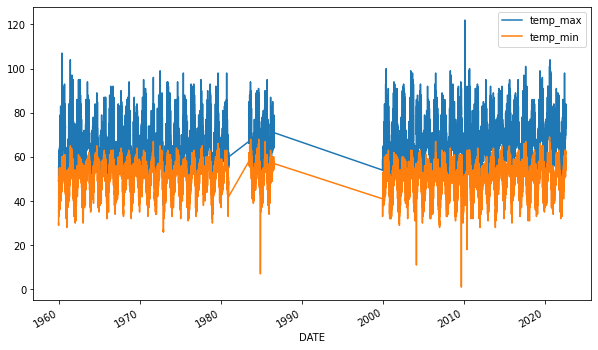

In [22]:
core_data[["temp_max","temp_min"]].plot(figsize=(10,6));

As can be seen, the data has missing values between 1990 and 2000.

In [23]:
core_data.index.year.value_counts().sort_index()

1960    366
1961    365
1962    365
1963    365
1964    366
1965    365
1966    365
1967    365
1968    366
1969    365
1970    365
1971    365
1972    366
1973    365
1974    365
1975    365
1976    366
1977    365
1978    365
1979    365
1980    366
1983    184
1984    366
1985    365
1986    212
2000    365
2001    365
2002    365
2003    365
2004    366
2005    365
2006    365
2007    365
2008    366
2009    365
2010    365
2011    365
2012    365
2013    365
2014    365
2015    365
2016    366
2017    365
2018    365
2019    365
2020    366
2021    365
2022    231
Name: DATE, dtype: int64

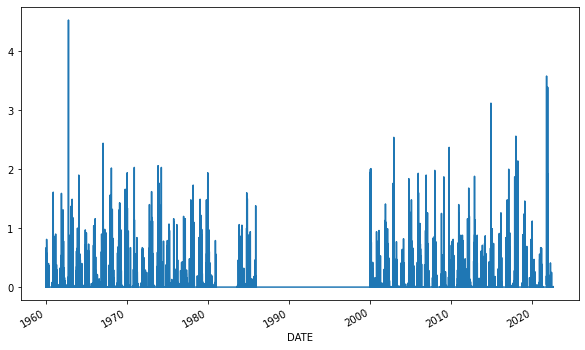

In [24]:
plt.figure(figsize=(10,6))
core_data["precip"].plot();

In [25]:
# how much it rained each year

core_data.groupby(core_data.index.year).sum()["precip"]

DATE
1960    14.01
1961    13.87
1962    22.47
1963    19.11
1964    16.83
1965    16.32
1966    13.11
1967    23.98
1968    17.19
1969    25.70
1970    25.31
1971    10.61
1972    16.27
1973    29.37
1974    16.87
1975    17.54
1976     8.64
1977    11.70
1978    22.57
1979    23.79
1980    13.58
1983     7.13
1984    16.03
1985     8.50
1986     0.00
2000    21.09
2001    22.84
2002    19.12
2003    11.37
2004    12.97
2005    27.37
2006    22.79
2007    12.79
2008    13.86
2009    14.57
2010    22.67
2011    16.06
2012    22.93
2013     4.89
2014    19.62
2015     8.58
2016    19.77
2017    23.34
2018    16.82
2019    20.00
2020     6.42
2021    20.82
2022     2.13
Name: precip, dtype: float64

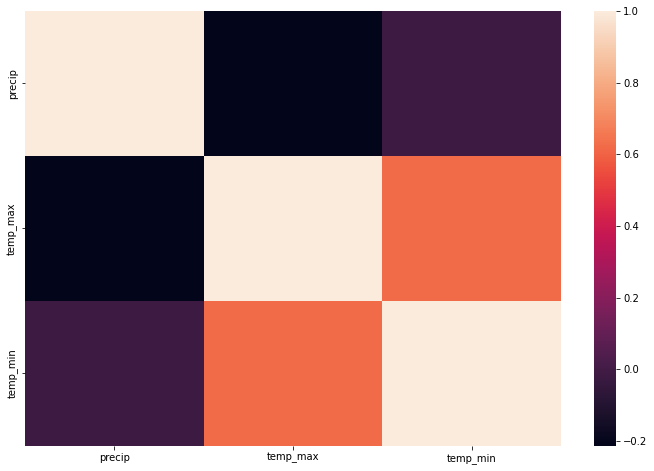

In [26]:
plt.figure(figsize=(12,8))
sns.heatmap(core_data.corr());

In [27]:
# shift : Shifts index by desired number of periods with an optional time `freq`.

core_data["target"] = core_data.shift(-1)["temp_max"]

In [28]:
core_data.tail(5)

,precip,temp_max,temp_min,target
DATE,,,,
2022-08-15,0.00,78.0,54.0,84.0
2022-08-16,0.00,84.0,55.0,77.0
2022-08-17,0.01,77.0,59.0,73.0
2022-08-18,0.00,73.0,55.0,70.0
2022-08-19,0.00,70.0,58.0,NaN


Notice there is a *missing value* in the last row because we don't have any data for 20th August 2022.

In [29]:
core_data = core_data.iloc[:-1,:].copy()
core_data.tail(3)

,precip,temp_max,temp_min,target
DATE,,,,
2022-08-16,0.00,84.0,55.0,77.0
2022-08-17,0.01,77.0,59.0,73.0
2022-08-18,0.00,73.0,55.0,70.0


# Training the Model

I will predict *tomorrow's maximum temperature* using historical data. I will use **Ridge regression**.

In [30]:
# parameter alpha controls how much the coefficient of the model penalized. 
# The greater the penalty, overfitting it prevented.

regression = Ridge(alpha=.1)

In [31]:
predictors = ["precip","temp_max","temp_min"]

In [32]:
train = core_data.loc[:"2020-12-31"]
test = core_data.loc["2021-01-01":]

In [33]:
regression.fit(train[predictors], train["target"])

Ridge(alpha=0.1)

In [34]:
predictions = regression.predict(test[predictors])

In [35]:
print(mean_absolute_error(test["target"],predictions))

3.4130894830812646


In [36]:
(print(predictions[:10])) # this is a numpy array

[59.80602384 59.31018141 58.53868467 61.53181394 59.44426643 59.01866638
 60.1630283  61.96468591 59.26695244 61.42799099]


In [37]:
combined_data = pd.concat([test["target"], pd.Series(predictions,index= test.index)], axis=1)
combined_data.columns = ["actual","predictions"]
combined_data.head()

,actual,predictions
DATE,,
2021-01-01,57.0,59.806024
2021-01-02,56.0,59.310181
2021-01-03,62.0,58.538685
2021-01-04,59.0,61.531814
2021-01-05,59.0,59.444266


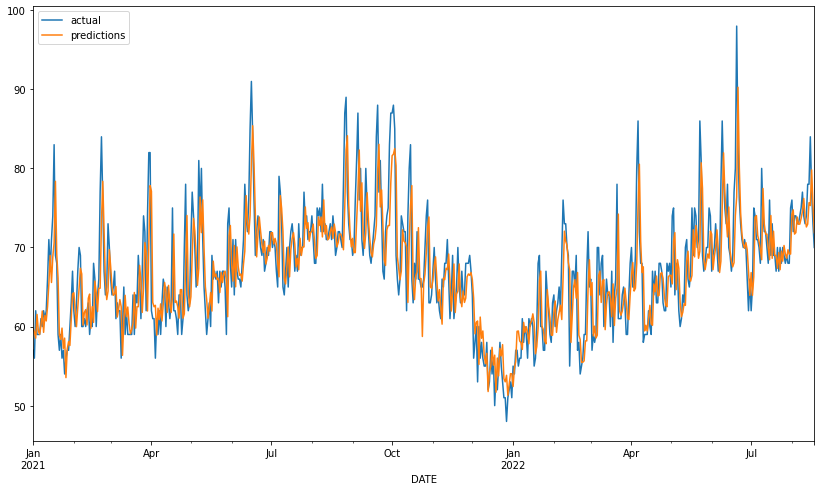

In [38]:
combined_data.plot(figsize=(14,8));

Our predictions looks like they are more conservative than the actual data.

**Regression coefficients** are estimates of the unknown population parameters and describe the relationship between a predictor variable and the response. 

In [39]:
print("Precipitation coefficient:",regression.coef_[0])
print("Maximum temperature coefficient:",regression.coef_[1])
print("Minimum temperature coefficient:",regression.coef_[2])

Precipitation coefficient: -2.2073038374577454
Maximum temperature coefficient: 0.7211383423247845
Minimum temperature coefficient: 0.17969046667743102


Precipitation has a *negative impact* on temperature. In Oakland it usually rains in winter. Therefore, this indicates to the model that tomorrow will probably be low.

In [40]:
def func_predictions(predictors, core_data, regression):
    
    train = core_data.loc[:"2020-12-31"]
    test = core_data.loc["2021-01-01":]
    
    regression.fit(train[predictors], train["target"])
    
    predictions = regression.predict(test[predictors])
    
    error = mean_absolute_error(test["target"],predictions)
    
    combined_data = pd.concat([test["target"], pd.Series(predictions,index= test.index)], axis=1)
    combined_data.columns = ["actual","predictions"]

    return error, combined_data

In [41]:
# What is the average temperature this month

core_data["avg_temp"] = core_data["temp_max"].rolling(30).mean()
core_data["month_day_max"] = core_data["avg_temp"] / core_data["temp_max"]
core_data["max_min"] = core_data["temp_max"] / core_data["temp_min"]

In [42]:
core_data.head(10)

,precip,temp_max,temp_min,target,avg_temp,month_day_max,max_min
DATE,,,,,,,
1960-01-01,0.00,49.0,30.0,49.0,NaN,NaN,1.633333
1960-01-02,0.00,49.0,29.0,54.0,NaN,NaN,1.689655
1960-01-03,0.00,54.0,35.0,54.0,NaN,NaN,1.542857
1960-01-04,0.00,54.0,36.0,55.0,NaN,NaN,1.500000
1960-01-05,0.00,55.0,33.0,53.0,NaN,NaN,1.666667
1960-01-06,0.00,53.0,38.0,56.0,NaN,NaN,1.394737
1960-01-07,0.00,56.0,46.0,54.0,NaN,NaN,1.217391
1960-01-08,0.45,54.0,49.0,51.0,NaN,NaN,1.102041
1960-01-09,0.61,51.0,46.0,55.0,NaN,NaN,1.108696


In [43]:
predictors = ["precip","temp_max","temp_min","avg_temp","month_day_max","max_min"]

core_data = core_data.iloc[30:,:].copy()

error, combined_data = func_predictions(predictors,core_data, regression)
print("New mean value error: ",error)

New mean value error:  3.3568300877060904


The error reduced a little bit. I will work on more features and analyzis to reduce it more.

# Working on New Features

In [44]:
# monthly average of all history data
core_data["monthly_avg"] = core_data["temp_max"].groupby(core_data.index.month).apply(lambda x : x.expanding(1).mean())

# dayly average of years
core_data["dayly_avg"] = core_data["temp_max"].groupby(core_data.index.day_of_year).apply(lambda x : x.expanding(1).mean())

core_data.head()

,precip,temp_max,temp_min,target,avg_temp,month_day_max,max_min,monthly_avg,dayly_avg
DATE,,,,,,,,,
1960-01-31,0.00,59.0,46.0,62.0,55.566667,0.941808,1.282609,59.0,59.0
1960-02-01,0.81,62.0,51.0,59.0,56.000000,0.903226,1.215686,62.0,62.0
1960-02-02,0.00,59.0,43.0,59.0,56.166667,0.951977,1.372093,60.5,59.0
1960-02-03,0.20,59.0,47.0,60.0,56.333333,0.954802,1.255319,60.0,59.0
1960-02-04,0.16,60.0,42.0,60.0,56.500000,0.941667,1.428571,60.0,60.0


In [46]:
predictors = ["precip","temp_max","temp_min","avg_temp","month_day_max","max_min","monthly_avg","dayly_avg"]

error, combined_data = func_predictions(predictors,core_data, regression)
print("New mean value error: ",error)

New mean value error:  3.3168583892773595


In [47]:
# checking the correlation with the target

core_data.corr()["target"]

precip          -0.205523
temp_max         0.820967
temp_min         0.594252
target           1.000000
avg_temp         0.686175
month_day_max   -0.422097
max_min          0.045319
monthly_avg      0.689204
dayly_avg        0.711518
Name: target, dtype: float64

In [49]:
combined_data["difference"] = (combined_data["actual"] - combined_data["predictions"]).abs()

combined_data.sort_values("difference",ascending=False).head()

,actual,predictions,difference
DATE,,,
2022-06-20,98.0,76.769311,21.230689
2022-05-23,86.0,69.834590,16.165410
2021-01-17,83.0,68.585837,14.414163
2021-05-07,81.0,67.774432,13.225568
2021-04-01,62.0,75.178360,13.178360
